# 1. Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"

response = requests.get(url)
data_io = io.BytesIO(response.content)

X, y = load_svmlight_file(data_io)

# Transform data to pandas DataFrame
df = pd.DataFrame(X.toarray())
df['target'] = y

# Show data head
df.head()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,0,1,2,3,4,5,6,7,target
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1.0


# 2. Data pre-processing

In [2]:
# Rename columns for readable
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Show the information of the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean     -0.547641    0.215020       0.132877      -0.585122   -0.811349   
std       0.39642

# 3. Splite the data

In [3]:
# Extract the features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#split the data
from sklearn.model_selection import train_test_split

X_bigtrain, X_test, y_bigtrain, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=11)

X_train, X_val, y_train, y_val = train_test_split(X_bigtrain, y_bigtrain, test_size=0.15, stratify=y_bigtrain, random_state=11)
print([X_train.shape, y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape])

[(554, 8), (554,), (116, 8), (116,), (98, 8), (98,)]


# 4. Build Model

# 4.1 Build baseline model (Perceptron)

In [4]:
# Implement a logistic regression model as the baseline model
baseline_model = Perceptron(max_iter=3000, random_state = 11)

# Training the baseline model on the training set
baseline_model.fit(X_train, y_train)

# Prediction on validation sets
y_val_pred_baseline = baseline_model.predict(X_val)

# 4.2 Evaluate the performance of baseline model

In [5]:
# Evaluate the metrics of the baseline model
from sklearn.metrics import (
    accuracy_score, recall_score,
    precision_score, roc_auc_score, f1_score
)
baseline_accuracy = accuracy_score(y_val, y_val_pred_baseline)
baseline_recall = recall_score(y_val, y_val_pred_baseline, pos_label=-1)

print(f'Baseline model performance on validation set:')
print(f'Accuracy: {baseline_accuracy:.2f}')
print(f'Recall: {baseline_recall:.2f}')

Baseline model performance on validation set:
Accuracy: 0.69
Recall: 0.15


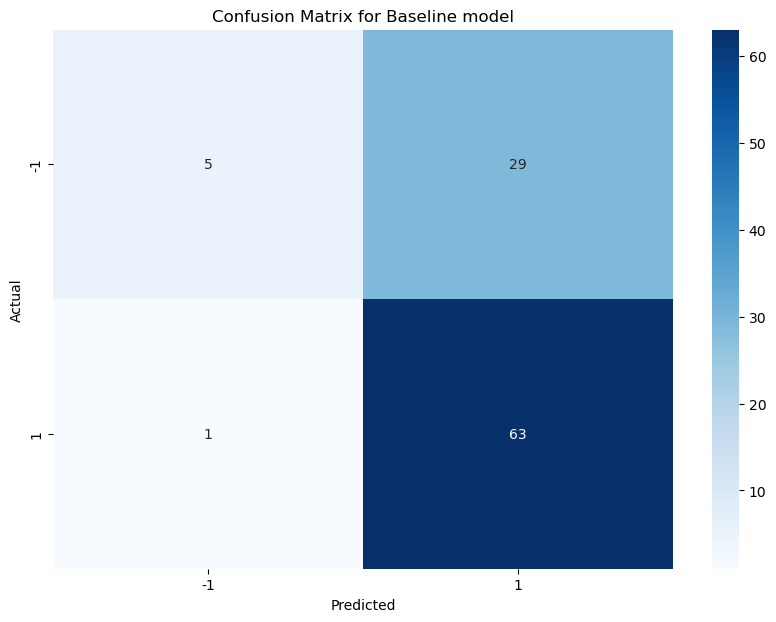

In [6]:
# Confusion matrix
baseline_conf_matrix = confusion_matrix(y_val, y_val_pred_baseline, labels=[-1, 1])
# Visual Confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(baseline_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Baseline model')
plt.show()

# 4.3 Build MLP model

In [7]:
# Implement a Multi-layer Perceptron model
mlp_model = MLPClassifier(max_iter=3000, random_state = 11)

# Training the mlp model on the training sets
mlp_model.fit(X_train, y_train)

# Prediction on validation sets
y_val_pred_mlp= mlp_model.predict(X_val)

# 4.4 Evaluate the performance of MLP model

In [8]:
# Evaluate the metrics of the mlp model
from sklearn.metrics import (
    accuracy_score, recall_score,
    precision_score, roc_auc_score, f1_score
)
mlp_accuracy = accuracy_score(y_val, y_val_pred_mlp)
mlp_recall = recall_score(y_val, y_val_pred_mlp, pos_label=-1)
print(f'mlp model performance on validation set:')
print(f'Accuracy: {mlp_accuracy:.2f}')
print(f'Recall: {mlp_recall:.2f}')

mlp model performance on validation set:
Accuracy: 0.73
Recall: 0.59


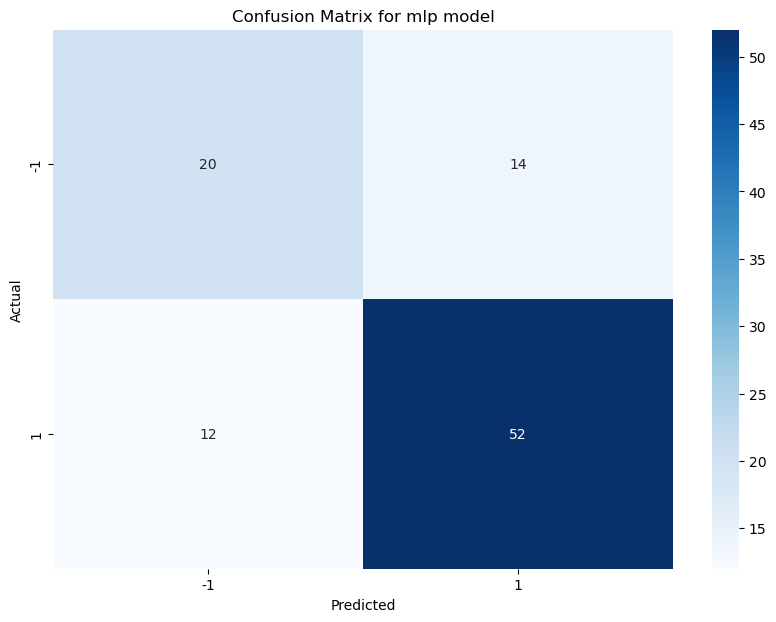

In [9]:
# Confusion matrix
mlp_conf_matrix = confusion_matrix(y_val, y_val_pred_mlp, labels=[-1, 1])
# Visual Confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for mlp model')
plt.show()

# 5 Model optimisation

# 5.1 Define parameter and training model

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, recall_score
import numpy as np

mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (128, 64), (256, 128), (256, 128, 64)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1], 
    'activation': ['relu', 'tanh', 'logistic']
}

# RandomizedSearchCV
mlp_search = RandomizedSearchCV(MLPClassifier(max_iter=4000, random_state=11), 
                                mlp_param_grid,
                                n_iter=10,  
                                scoring={'accuracy': 'accuracy', 'recall': make_scorer(recall_score, pos_label=-1)},
                                refit='recall',
                                cv=10, 
                                error_score='raise')

mlp_search.fit(X_train, y_train)


RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=MLPClassifier(max_iter=4000, random_state=11),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'hidden_layer_sizes': [(64,), (128,),
                                                               (256,),
                                                               (128, 64),
                                                               (256, 128),
                                                               (256, 128, 64)],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 0.1]},
                   refit='recall',
                   scoring={'accuracy': 'accuracy',
                            'recall': make_scorer(recall_score, pos_label=-1)})

# 5.2 Show results for all combinations of parameters

In [17]:
# Extract the results of recall and accuracy
cv_results = mlp_search.cv_results_

results_df = pd.DataFrame({
    'hidden_layer_sizes': [param['hidden_layer_sizes'] for param in cv_results['params']],
    'learning_rate_init': [param['learning_rate_init'] for param in cv_results['params']],
    'activation': [param['activation'] for param in cv_results['params']],
    'mean_test_accuracy': cv_results['mean_test_accuracy'],
    'mean_test_recall': cv_results['mean_test_recall'],  # recall 结果
    'std_test_accuracy': cv_results['std_test_accuracy'],
    'std_test_recall': cv_results['std_test_recall']
})

print(results_df)

  hidden_layer_sizes  learning_rate_init activation  mean_test_accuracy  \
0          (128, 64)              0.0100       tanh            0.705617   
1              (64,)              0.0100   logistic            0.783279   
2         (256, 128)              0.0100   logistic            0.767013   
3              (64,)              0.0001   logistic            0.716429   
4     (256, 128, 64)              0.0100       relu            0.711429   
5             (128,)              0.1000       tanh            0.758214   
6     (256, 128, 64)              0.0010   logistic            0.776006   
7             (256,)              0.1000       tanh            0.729351   
8          (128, 64)              0.0001   logistic            0.649870   
9              (64,)              0.0010       relu            0.769091   

   mean_test_recall  std_test_accuracy  std_test_recall  
0          0.530263           0.062468         0.112312  
1          0.597632           0.041143         0.090631  


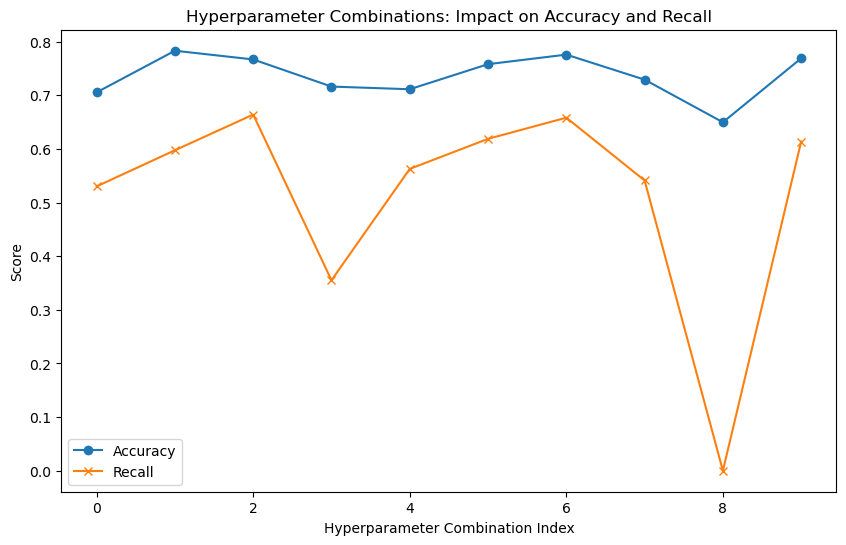

In [18]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['mean_test_accuracy'], marker='o', label='Accuracy')
plt.plot(results_df.index, results_df['mean_test_recall'], marker='x', label='Recall')
plt.title('Hyperparameter Combinations: Impact on Accuracy and Recall')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Score')
plt.legend()
plt.show()

# 5.3 Select the best model and evaluate the performance of best model on validation sets

In [19]:
# Extract the combinations of parameters of best model
bestmlp = mlp_search.best_estimator_
print(f"Best parameters for MLP: {bestmlp}")

best_mlp_p = bestmlp.predict(X_val)
# Evaluate the performance of best model on validation sets
best_mlp_accuracy = accuracy_score(y_val, best_mlp_p)
best_mlp_recall = recall_score(y_val, best_mlp_p, pos_label=-1)
print(f"Best MLP Model - Accuracy: {best_mlp_accuracy}, Recall: {best_mlp_recall}")

Best parameters for MLP: MLPClassifier(activation='logistic', hidden_layer_sizes=(256, 128),
              learning_rate_init=0.01, max_iter=4000, random_state=11)
Best MLP Model - Accuracy: 0.7755102040816326, Recall: 0.7058823529411765


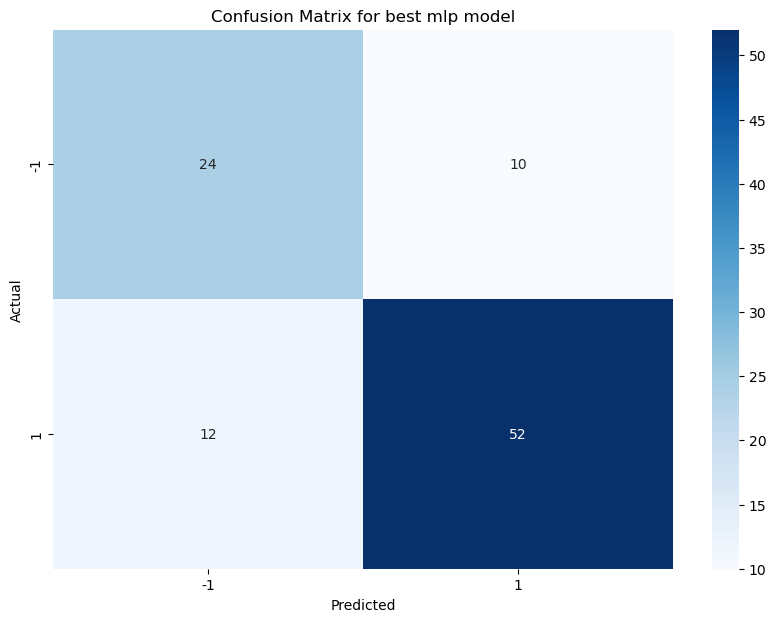

In [14]:
# Visual confusion matrix

# Confusion matrix
best_conf_matrix = confusion_matrix(y_val, best_mlp_p, labels=[-1, 1])
# Visual Confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for best mlp model')
plt.show()


# 5.4 Visualize the training loss curve

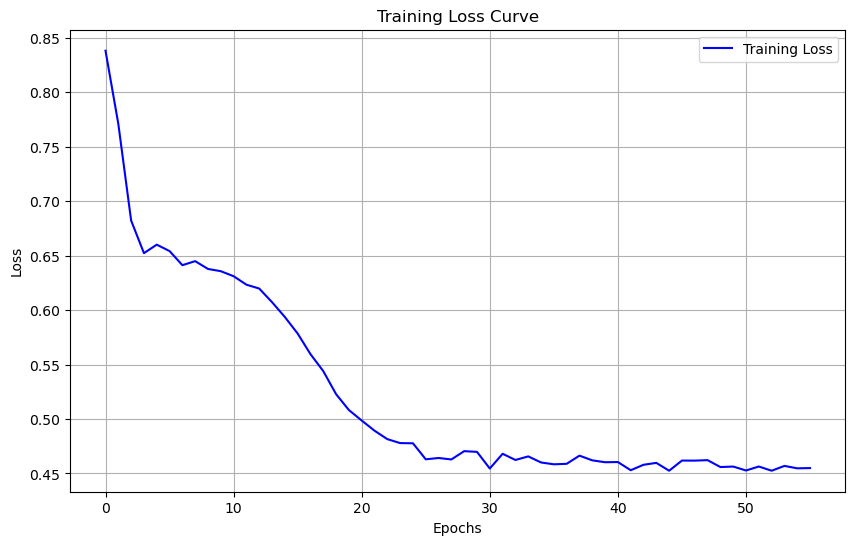

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Assuming bestmlp already has the trained model and X_val, y_val are available
train_loss = bestmlp.loss_curve_  # Loss values during training from MLPClassifier

# Calculate validation loss
val_pred_proba = bestmlp.predict_proba(X_val)
val_loss = log_loss(y_val, val_pred_proba)

# Plotting the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss", color='blue')
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 5.5 Evaluate the performance of best model on test set

In [15]:

test_pred = bestmlp.predict(X_test)

test_accuracy = accuracy_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred, pos_label=-1)
print(f"Best Model on Test Set - Accuracy: {test_accuracy}, Recall: {test_recall}")


Best Model on Test Set - Accuracy: 0.6810344827586207, Recall: 0.55


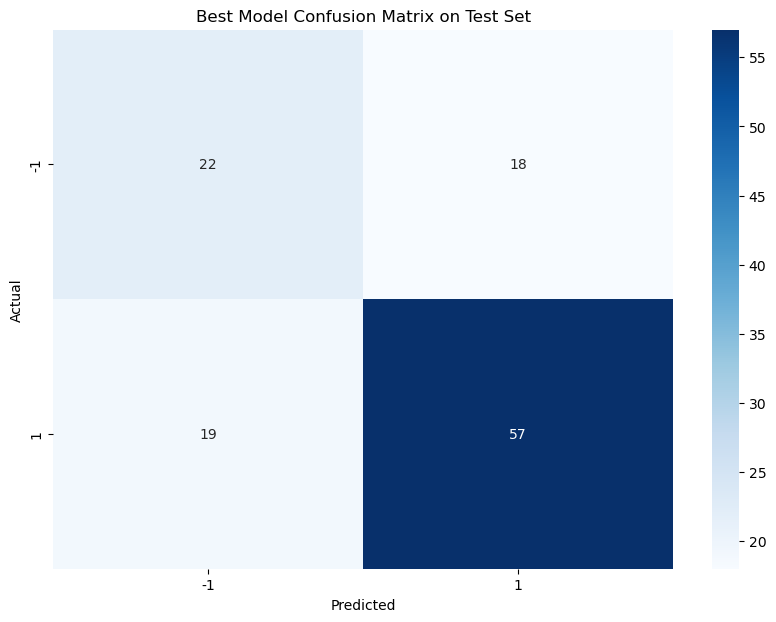

In [16]:
test_cm = confusion_matrix(y_test, test_pred)

# Visual Confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Best Model Confusion Matrix on Test Set")
plt.show()